In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
df = pd.read_excel('KPMG_clean_data.xlsx', sheet_name="NewCustomerList") 
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,63.049315,General Manager,Manufacturing,Mass Customer,N,...,QLD,Australia,6,0.52,0.6500,0.8125,0.690625,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,50.347945,Structural Engineer,Property,Mass Customer,N,...,NSW,Australia,11,0.90,0.9000,1.1250,0.956250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,45.909589,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,VIC,Australia,5,1.08,1.0800,1.0800,1.080000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,41.487671,Account Representative III,Manufacturing,Affluent Customer,N,...,QLD,Australia,1,0.53,0.6625,0.6625,0.662500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,54.849315,Financial Analyst,Financial Services,Affluent Customer,N,...,NSW,Australia,9,0.44,0.4400,0.5500,0.550000,4,4,1.703125


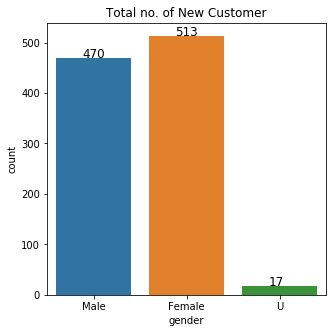

In [243]:
gender = df['gender'].value_counts()
f = gender[0]; m = gender[1]; u = gender[2]
gender=[m,f,u]
fig,ax = plt.subplots(figsize=(5,5))
sns.countplot(x='gender',data = df,ax=ax)
plt.title('Total no. of New Customer')
for i in range(len(gender)):
    plt.text(x = i-0.12, y = gender[i]+0.6, s = gender[i], size = 12)
plt.show()

**Insight - The Company has more no. of female customer rather than male.** 

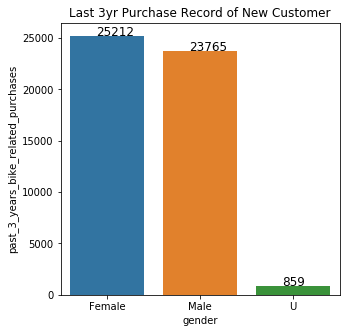

In [244]:
x = df.groupby('gender')['past_3_years_bike_related_purchases'].agg(sum)
x = x.reset_index()
val = x['past_3_years_bike_related_purchases']

fig,ax = plt.subplots(figsize=(5,5))
sns.barplot(x = 'gender', y='past_3_years_bike_related_purchases',data=x,ax=ax)
plt.title('Last 3yr Purchase Record of New Customer')
for i in range(len(val)):
    plt.text(x = i-0.12, y = val[i]+0.7, s = val[i], size = 12)


**Insight- Female purchases more no. of bike\bike parts than male.**

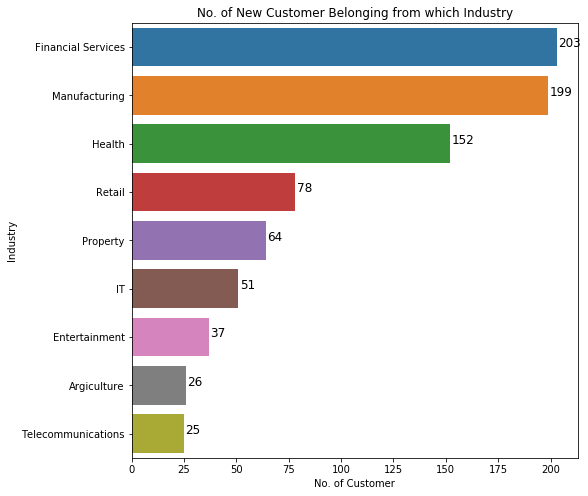

In [252]:
x = df['job_industry_category']
x = x.dropna()
x = x.value_counts()
x = x.reset_index()
val = x['job_industry_category']
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'job_industry_category', y='index',data=x,ax=ax)
plt.title('No. of New Customer Belonging from which Industry')
plt.xlabel('No. of Customer')
plt.ylabel('Industry')
for i in range(len(val)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)

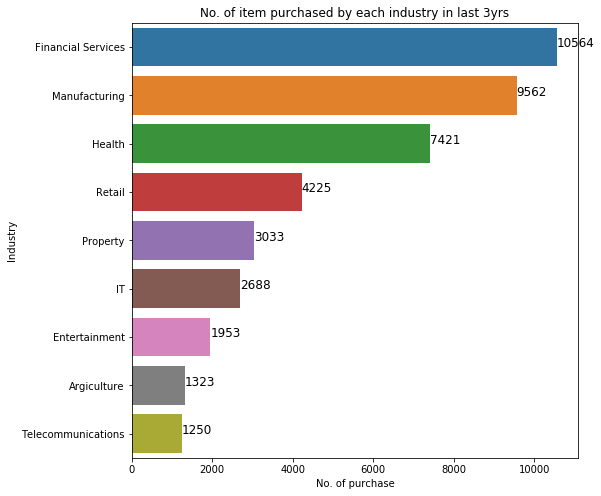

In [181]:
x = df[['past_3_years_bike_related_purchases', 'job_industry_category']]
x = x.dropna()
x = x.groupby('job_industry_category').agg(sum)
x = x.sort_values(by='past_3_years_bike_related_purchases',ascending=False)
x = x.reset_index()
val = x['past_3_years_bike_related_purchases']
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'past_3_years_bike_related_purchases', y='job_industry_category',data=x,ax=ax)
plt.title('No. of item purchased by each industry in last 3yrs')
plt.xlabel('No. of purchase')
plt.ylabel('Industry')
for i in range(len(val)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)

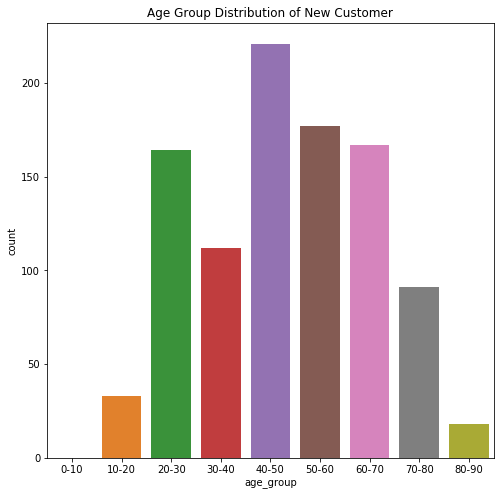

In [265]:
x = df[['Age']]
x = x.dropna()
x = x.astype(int)
x['age_group'] = pd.cut(x=x['Age'], bins=[0,10,20,30,40,50,60,70,80,90], labels=['0-10','10-20','20-30',\
                                                            '30-40','40-50','50-60','60-70','70-80','80-90'], right=True)

fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(x ='age_group',data=x)
plt.title('Age Group Distribution of New Customer')
plt.show()

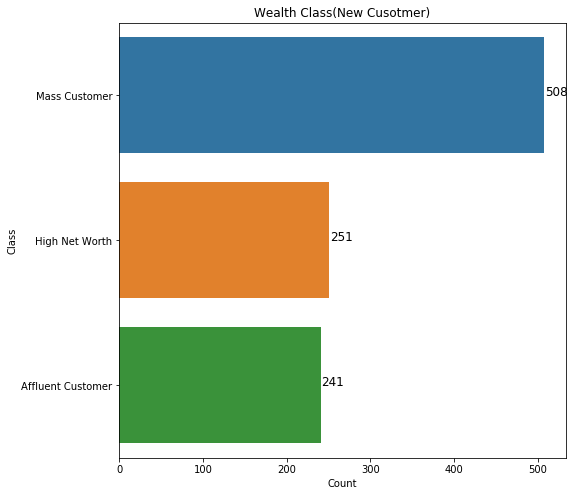

In [254]:
x = df['wealth_segment']
x = x.value_counts().reset_index()
val = x['wealth_segment']
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'wealth_segment', y='index',data=x,ax=ax)
plt.title('Wealth Class(New Cusotmer)')
plt.xlabel('Count')
plt.ylabel('Class')
for i in range(len(val)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)

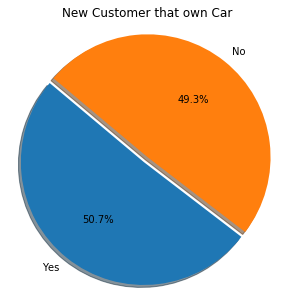

In [247]:
x = df['owns_car']
x = x.value_counts(normalize=True) * 100

explode = [0.0,0.05];labels = ['Yes','No']
fig,ax = plt.subplots(figsize=(5,5))
plt.pie(x, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('New Customer that own Car')
plt.show()

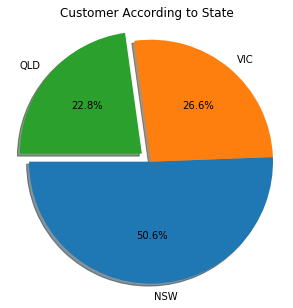

In [121]:
x = df['state']
x = x.value_counts(normalize=True)*100
x=x.reset_index()
labels = x['index']

explode = [0.0,0.0,0.1];
fig,ax = plt.subplots(figsize=(5,5))
plt.pie(x['state'], explode=explode, labels = labels,autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title('Customer According to State')
plt.show()


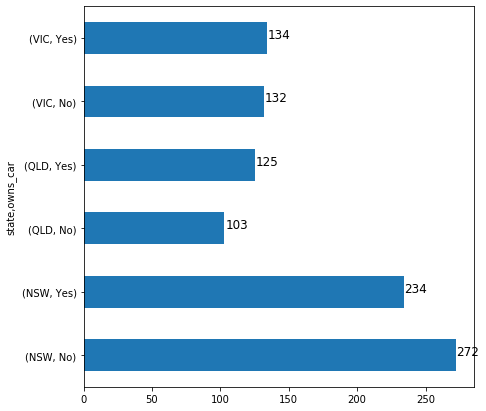

In [264]:
x = df[['state','owns_car']]
x = x.groupby(['state','owns_car']).agg(len)
val = x
fig,ax = plt.subplots(figsize=(7,7))
x.plot(kind='barh')
for i in range(len(x)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)
plt.show()

In [210]:
df = pd.read_excel('KPMG_clean_data.xlsx', sheet_name=1)
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03 00:00:00,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10 00:00:00,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21 00:00:00,802.26
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-10 00:00:00,104.24
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-20 00:00:00,1592.19
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216,NaN


In [211]:
print(df.isna().sum())


x = df[df['order_status'] == 'Approved']
print('******************************')
print(df.isna().sum())

x = x[x['online_order'] == 1]
print('******************************')
print(x.isna().sum())

x = x.dropna(subset=['brand'])
print('******************************')
print(x.isna().sum())


transaction_id                 0
product_id                     0
customer_id                    0
transaction_date               0
online_order                 360
order_status                   0
brand                        197
product_line                 197
product_class                197
product_size                 197
list_price                     0
standard_cost                197
product_first_sold_date      197
Profit                     10358
dtype: int64
******************************
transaction_id                 0
product_id                     0
customer_id                    0
transaction_date               0
online_order                 360
order_status                   0
brand                        197
product_line                 197
product_class                197
product_size                 197
list_price                     0
standard_cost                197
product_first_sold_date      197
Profit                     10358
dtype: int64
*******************

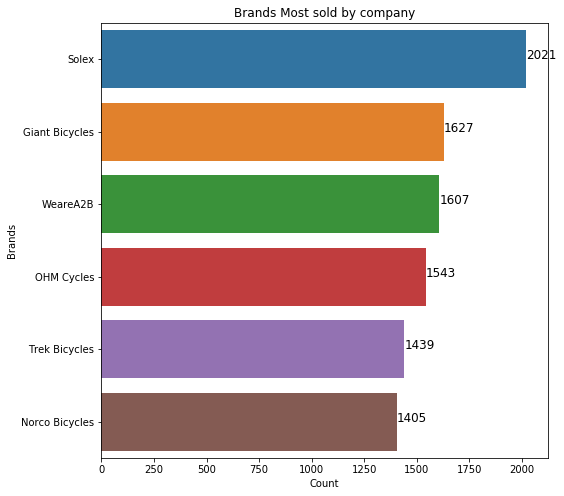

In [63]:
brand = x['brand'].value_counts().reset_index()
val = brand['brand']
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'brand', y='index',data=brand,ax=ax)
plt.title('Brands Most sold by company')
plt.xlabel('Count')
plt.ylabel('Brands')
for i in range(len(val)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)

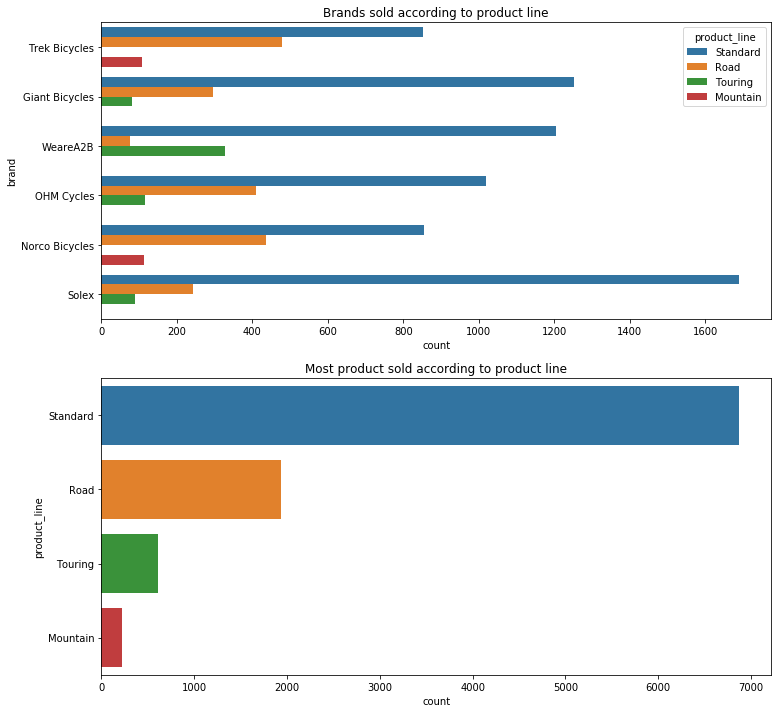

In [240]:
product = x[['product_line','brand']]
fig,ax = plt.subplots(2,1,figsize=(12,12))
sns.countplot(y ='brand',hue = 'product_line',data=product,ax=ax[0])
ax[0].set_title('Brands sold according to product line')

sns.countplot(y = 'product_line',data=product,ax=ax[1])
ax[1].set_title('Most product sold according to product line')
plt.show()

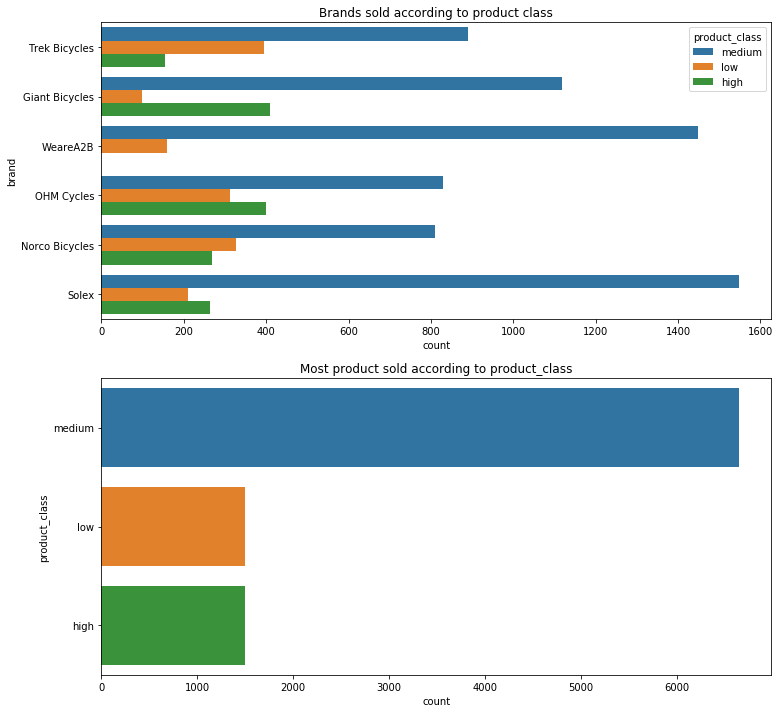

In [91]:
product = x[['brand','product_class']]
fig,ax = plt.subplots(2,1,figsize=(12,12))
sns.countplot(y ='brand',hue = 'product_class',data=product,ax=ax[0])
ax[0].set_title('Brands sold according to product class')

sns.countplot(y = 'product_class',data=product,ax=ax[1])
ax[1].set_title('Most product sold according to product_class')
plt.show()

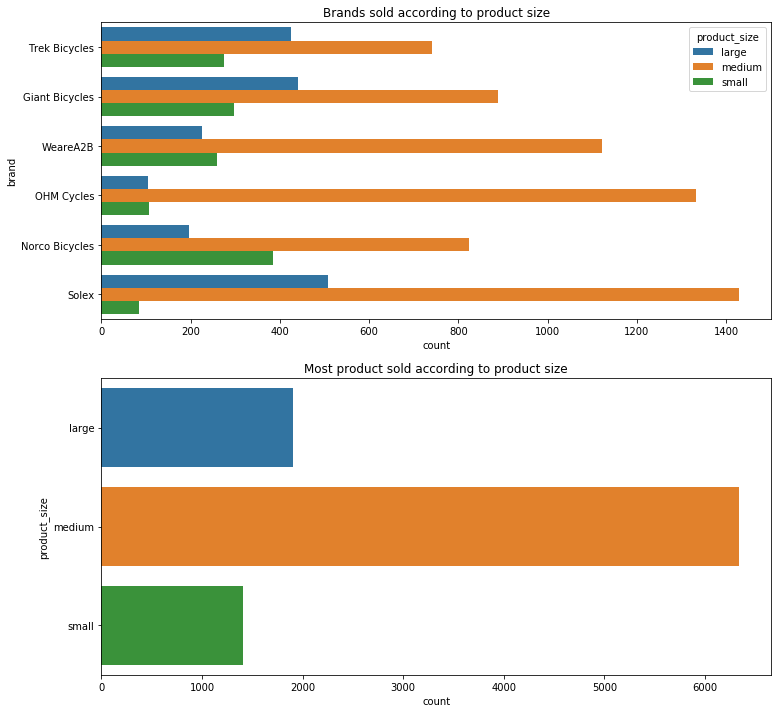

In [94]:
product = x[['brand','product_size']]
fig,ax = plt.subplots(2,1,figsize=(12,12))
sns.countplot(y ='brand',hue = 'product_size',data=product,ax=ax[0])
ax[0].set_title('Brands sold according to product size')

sns.countplot(y = 'product_size',data=product,ax=ax[1])
ax[1].set_title('Most product sold according to product size')
plt.show()

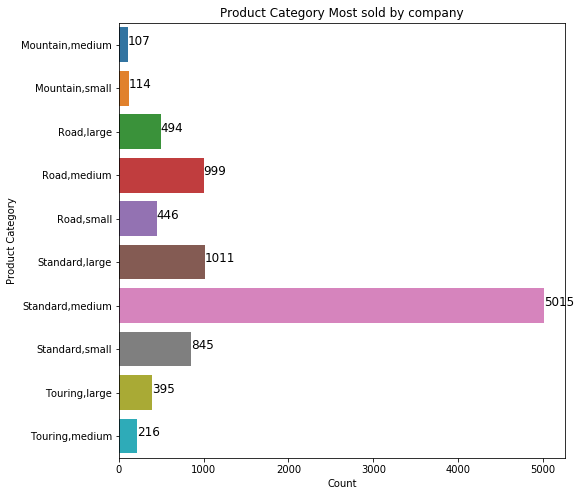

In [108]:
product = x[['product_line','product_size']]
product = product.groupby(['product_line','product_size']).agg(len).reset_index()
product['Product'] = product['product_line'].str.cat(product['product_size'], sep =",")
product = product[['Product',0]]
product.columns = ['Product Category','Count']
val = product['Count']

fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'Count', y='Product Category',data=product,ax=ax)
plt.title('Product Category Most sold by company')
for i in range(len(val)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)

## Brand which Makes Big profits to Company

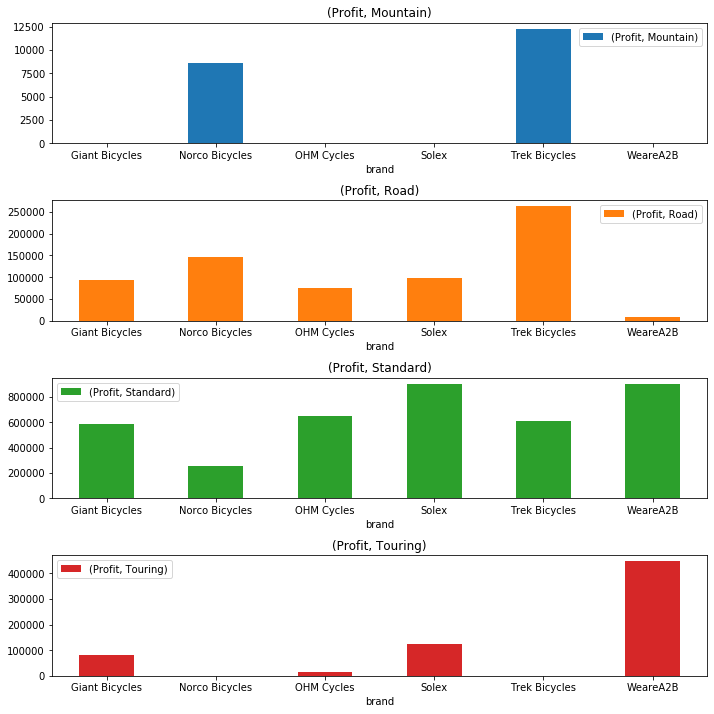

In [238]:
profit = x[['brand','product_line','Profit']]
profit = profit.groupby(['brand','product_line']).agg(sum)
fig,ax =  plt.subplots(figsize=(10,10))
profit = profit.unstack(level=-1).plot(kind='bar', subplots=True,ax=ax,xticks=[])
fig.tight_layout(pad=1.0)
plt.show()


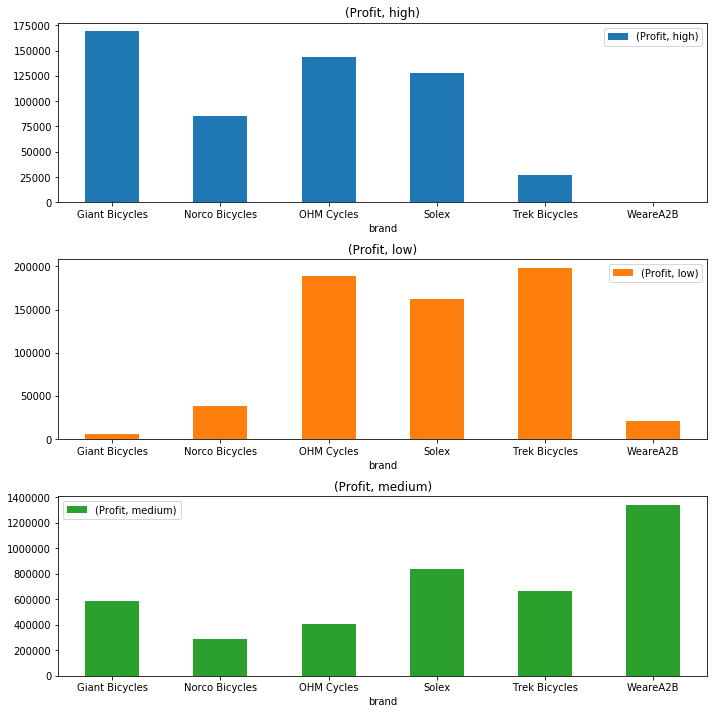

In [205]:
profit = x[['brand','product_class','Profit']]
profit = profit.groupby(['brand','product_class']).agg(sum)
fig,ax =  plt.subplots(figsize=(10,10))
profit.unstack(level=-1).plot(kind='bar', subplots=True ,ax=ax,xticks=[])
fig.tight_layout(pad=1.0)
plt.show()


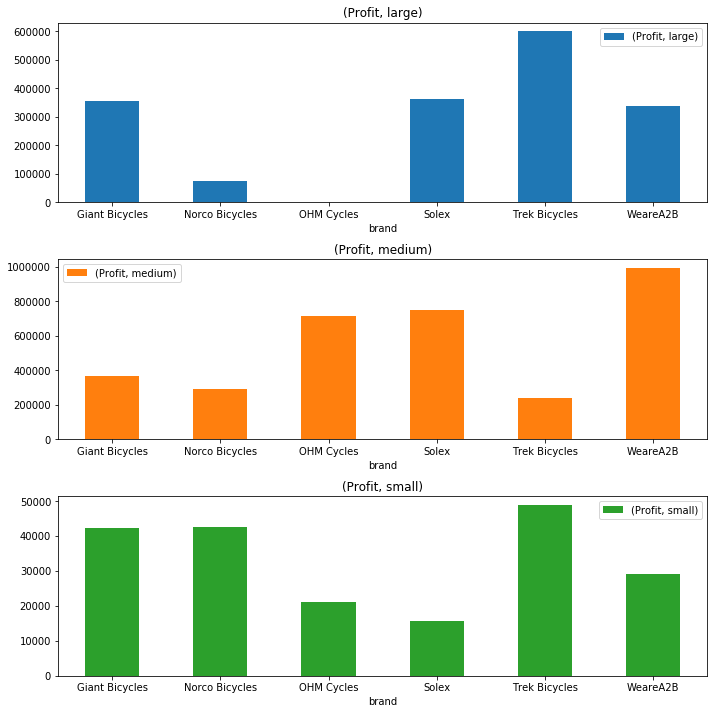

In [204]:
profit = x[['brand','product_size','Profit']]
profit = profit.groupby(['brand','product_size']).agg(sum)
fig,ax =  plt.subplots(figsize=(10,10))
profit.unstack(level=-1).plot(kind='bar', subplots=True ,ax=ax,xticks=[])
fig.tight_layout(pad=1.0)
plt.show()


In [221]:
year_profit = x[['transaction_date','brand','Profit']]
year_profit['month'] = pd.DatetimeIndex(year_profit['transaction_date']).month
year_profit

C:\Users\SHADOW\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,transaction_date,brand,Profit,month
1,2017-05-21,Trek Bicycles,1702.55,5
4,2017-10-01,Giant Bicycles,1055.82,10
5,2017-03-08,Giant Bicycles,709.34,3
6,2017-04-21,WeareA2B,15.08,4
9,2017-08-30,WeareA2B,1069.55,8
...,...,...,...,...
19994,2017-05-13,OHM Cycles,75.14,5
19995,2017-06-24,OHM Cycles,802.26,6
19996,2017-11-09,Solex,104.24,11
19997,2017-04-14,OHM Cycles,1592.19,4


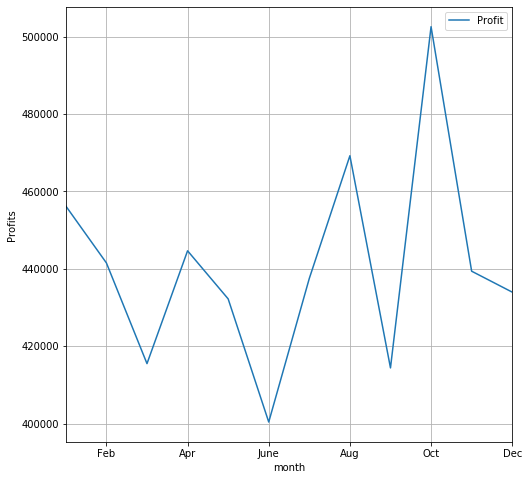

In [234]:
month_profit = year_profit.groupby(['month']).agg(sum)
month_profit.reset_index(inplace=True)
fig,ax=plt.subplots(figsize=(8,8))
month_profit.plot(x = 'month',y='Profit',kind='line',ax=ax,grid=True)
plt.ylabel('Profits')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','June','Aug','Oct','Dec'])
plt.show()